In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

In [4]:
#資料提取
df=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#資料轉型(float->int)
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


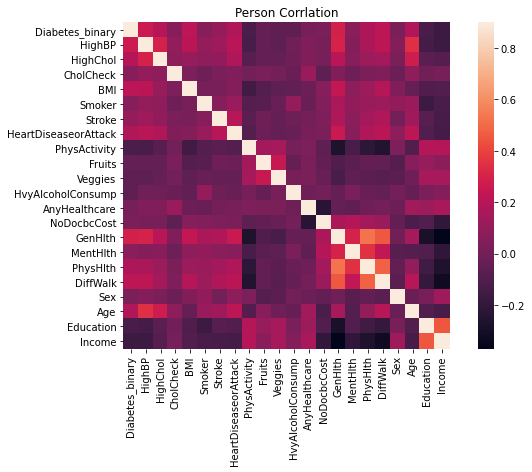

In [7]:
#heatmap correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),vmax=0.9,square=True)
plt.title('Person Corrlation')
plt.show()

In [8]:
#資料分割
X=df.drop('Diabetes_binary',axis=1)
y=df['Diabetes_binary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


In [9]:
#random forest
rf=RandomForestClassifier(random_state=1,max_features='sqrt',n_jobs=1,verbose=1)
%time rf.fit(X_train,y_train)
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 19.5 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


0.8589693051613582

In [10]:
#預測
y_pred=rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [11]:
#MSE&RMSE檢查
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error:'+str(mse))
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:'+str(rmse))

Mean Squared Error:0.14103069483864186
Root Mean Squared Error:0.3755405368780338


[[63593  1757]
 [ 8976  1778]]


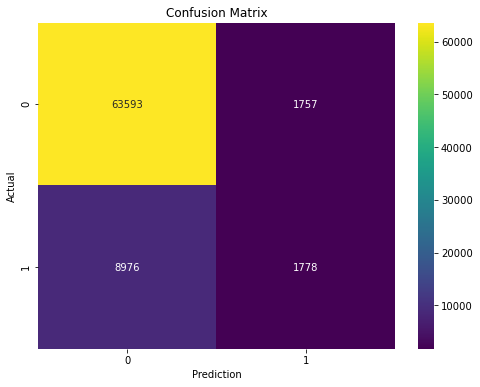

In [12]:
#混淆矩陣
matrix=metrics.confusion_matrix(y_test,y_pred)
print(matrix)

#熱力圖矩陣
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [13]:
#分類結果
report=metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     65350
           1       0.50      0.17      0.25     10754

    accuracy                           0.86     76104
   macro avg       0.69      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104



In [14]:
#檢查特徵重要性
feature=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature)

BMI                     0.182946
Age                     0.121984
Income                  0.100266
PhysHlth                0.083499
GenHlth                 0.070421
Education               0.070301
MentHlth                0.064000
HighBP                  0.041406
Smoker                  0.033860
Fruits                  0.033164
Sex                     0.027846
HighChol                0.027443
Veggies                 0.026501
PhysActivity            0.025961
DiffWalk                0.023561
HeartDiseaseorAttack    0.018910
NoDocbcCost             0.015357
Stroke                  0.012512
AnyHealthcare           0.008731
HvyAlcoholConsump       0.007669
CholCheck               0.003662
dtype: float64


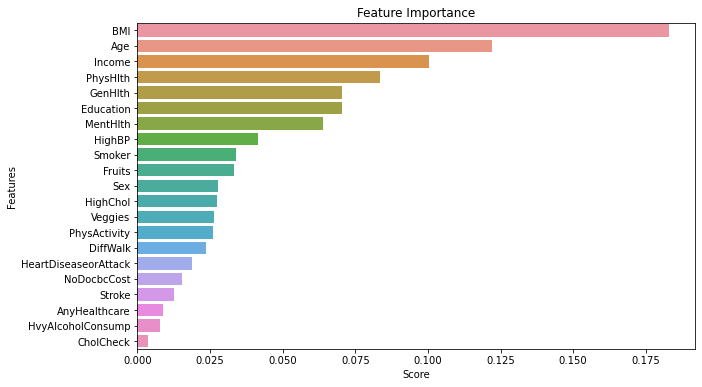

In [15]:
#可視化特徵
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [16]:
#視覺化
df.Diabetes_binary[df['Diabetes_binary'] == 0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1] = 'Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Junior High School'
df.Education[df['Education'] == 4] = 'Senior High School'
df.Education[df['Education'] == 5] = 'Undergraduate Degree'
df.Education[df['Education'] == 6] = 'Magister'

df.Income[df['Income'] == 1] = 'Less Than $10,000'
df.Income[df['Income'] == 2] = 'Less Than $10,000'
df.Income[df['Income'] == 3] = 'Less Than $10,000'
df.Income[df['Income'] == 4] = 'Less Than $10,000'
df.Income[df['Income'] == 5] = 'Less Than $35,000'
df.Income[df['Income'] == 6] = 'Less Than $35,000'
df.Income[df['Income'] == 7] = 'Less Than $35,000'
df.Income[df['Income'] == 8] = '$75,000 or More'
df.head()

<ipython-input-16-19e2d09ffa9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighBP[df['HighBP'] == 0] = 'No High'
<ipython-input-16-19e2d09ffa9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
<ipython-input-16-19e2d09ffa9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'
<ipython-input-16-19e2d09ffa9b>:11: SettingW

<ipython-input-16-19e2d09ffa9b>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Education[df['Education'] == 6] = 'Magister'
<ipython-input-16-19e2d09ffa9b>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Income[df['Income'] == 1] = 'Less Than $10,000'


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Poor,18,15,Yes,Female,9,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,7,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Poor,30,30,Yes,Female,9,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Very Good,0,0,No,Female,11,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Very Good,3,0,No,Female,11,Undergraduate Degree,"Less Than $10,000"
